In [1]:
import pandas as pd
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data
from augerscalerpy.plot_config import configure_plots

3.7.0


##### Lectura del archivo con los parámetros solares

In [2]:

spar = pd.read_csv('solar_parameters/auger_solar_parameter_1D.csv')
spar

,date,sunspots,solarw,CRI
0,1818-01-01,NaN,NaN,NaN
1,1818-01-02,NaN,NaN,NaN
2,1818-01-03,NaN,NaN,NaN
3,1818-01-04,NaN,NaN,NaN
4,1818-01-05,NaN,NaN,NaN
...,...,...,...,...
75143,2023-09-26,17.2,462.0,1661.799868
75144,2023-09-27,18.3,455.0,1661.799868
75145,2023-09-28,9.4,394.0,1661.799868
75146,2023-09-29,9.0,431.0,1661.799868


### Gráfica comparativa entre CRI, SW y SN

In [3]:
# Filtrando los datos para el rango de años de enero de 2006 a septiembre de 2021
start_date = '2006-01-01'
end_date = '2021-09-30'
sparf = spar[(spar['date'] >= start_date) & (spar['date'] <= end_date)]
sparf.set_index('date', inplace=True)
sparf = sparf.astype('float64') # 

############################################ # Convertir las columnas en arreglos de NumPy

sparf.reset_index(inplace = True)
date_sc = sparf['date'].values
CRI = sparf['CRI'].values
SNvals = sparf['sunspots'].values
SWvals = sparf['solarw'].values

In [12]:
date_sc

array(['2006-01-01', '2006-01-02', '2006-01-03', ..., '2021-09-28',
       '2021-09-29', '2021-09-30'], dtype=object)

In [14]:
date_sc

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', length=5752, freq=None)

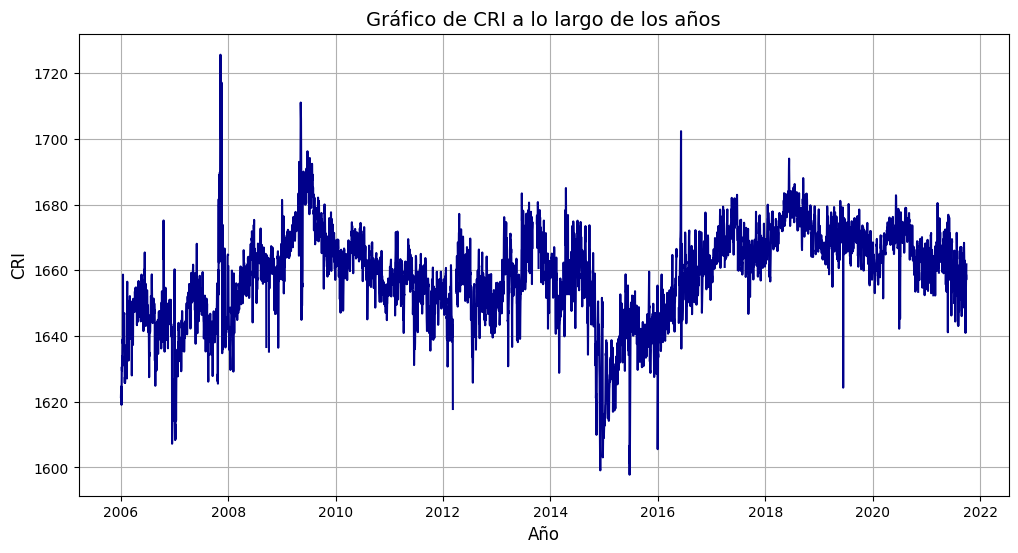

In [4]:
configure_plots()

# Convierte las cadenas de texto en objetos de fecha y hora de Pandas
date_sc = pd.to_datetime(date_sc)
# Calcula los años a partir de las fechas en 'date_sc'
years = date_sc.year

# Crea la gráfica
plt.figure(figsize=(12, 6))
plt.plot(date_sc, CRI, color='darkblue', label='IRC Pierre Auger')
plt.title('Gráfico de CRI a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('CRI')
plt.grid()
# Configura las etiquetas del eje x
#plt.xticks(np.arange(0, len(date_sc), step=365), years[::365], rotation=45)

# Muestra la gráfica
plt.show()


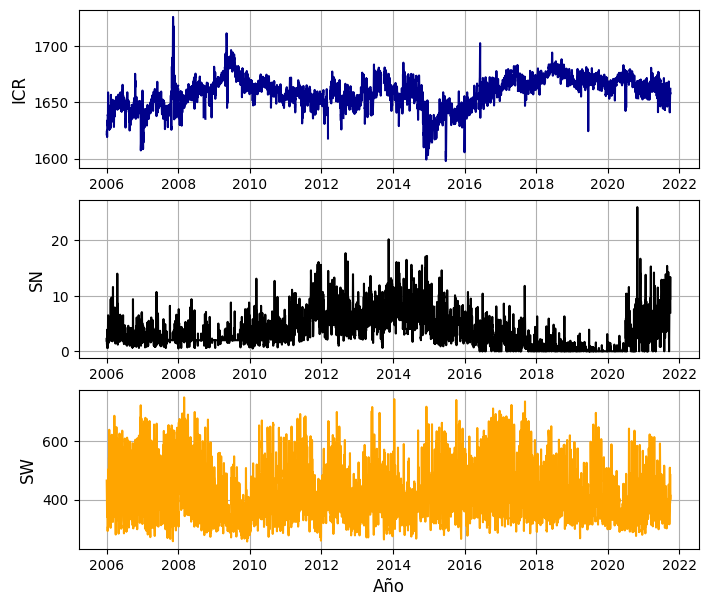

In [7]:
#Crear tres gráficos independientes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 7))
configure_plots()

# Gráfico 1: scaler_daily
#ax1.plot(scaler_filtered['Date'], scaler_filtered['ScalerCorr'].to_numpy(), color='blue', label='ScalerCorr')
ax1.plot(date_sc, CRI , color='darkblue', label='IRC Pierre Auger')
ax1.set_title('')
ax1.set_ylabel('ICR')
ax1.grid()

# Gráfico 2: SSN
#ax2.plot(SSN_filtered['date'], SSN_filtered['SSN'].to_numpy(), color='green', label='SSN')
ax2.plot(date_sc, SNvals, color='black', label='Sunspot number')
ax2.set_title('')
ax2.set_ylabel('SN')
ax2.grid()

# Gráfico 3: SW
#ax3.plot(SW_filtered['date'], SW_filtered['solarw'].to_numpy(), color='orange', label='SW')
ax3.plot(date_sc, SWvals, color='orange', label='Solar wind')
ax3.set_title('')
ax3.set_xlabel('Año')
ax3.set_ylabel('SW')
ax3.grid()
#plt. savefig('CRI_SN_SW_comparison.png')
#plt. savefig('CRI_SN_SW_comparison.pdf')


plt.show()


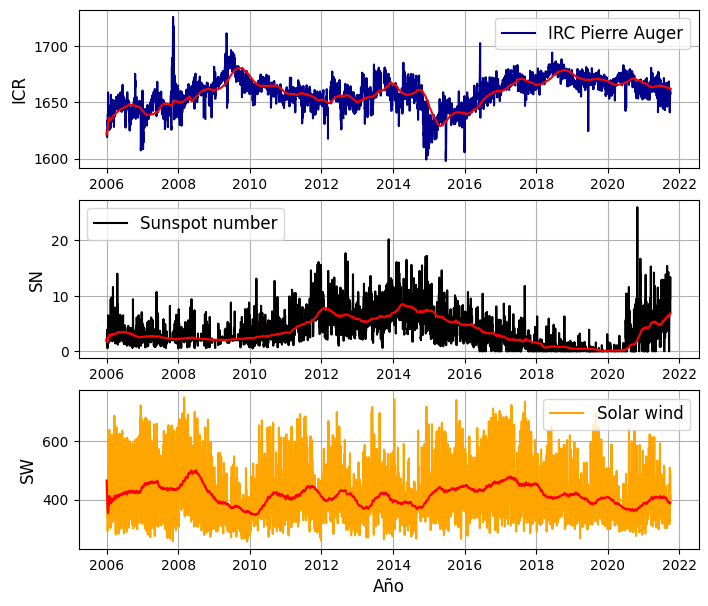

In [23]:
# Crear tres gráficos independientes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 7))
configure_plots()

# Gráfico 1: ICR
ax1.plot(date_sc, CRI, color='darkblue', label='IRC Pierre Auger')
ax1.set_title('')
ax1.set_ylabel('ICR')
ax1.grid()

# Calcular y graficar el promedio suavizado en el Gráfico 1
rolling_CRI = pd.Series(CRI).rolling(window=180, min_periods=1).mean()
ax1.plot(date_sc, rolling_CRI, color='red', linestyle='-', label='')

# Gráfico 2: Sunspot number
ax2.plot(date_sc, SNvals, color='black', label='Sunspot number')
ax2.set_title('')
ax2.set_ylabel('SN')
ax2.grid()

# Calcular y graficar el promedio suavizado en el Gráfico 2
rolling_SNvals = pd.Series(SNvals).rolling(window=180, min_periods=1).mean()
ax2.plot(date_sc, rolling_SNvals, color='red', linestyle='-', label='')

# Gráfico 3: Solar wind
ax3.plot(date_sc, SWvals, color='orange', label='Solar wind')
ax3.set_title('')
ax3.set_xlabel('Año')
ax3.set_ylabel('SW')
ax3.grid()

# Calcular y graficar el promedio suavizado en el Gráfico 3
rolling_SWvals = pd.Series(SWvals).rolling(window=180, min_periods=1).mean()
ax3.plot(date_sc, rolling_SWvals, color='red', linestyle='-', label='')

# Mostrar las leyendas en los gráficos
ax1.legend()
ax2.legend()
ax3.legend()

# Guardar la gráfica en un archivo (opcional)
#plt.savefig('CRI_SN_SW_over.png')
#plt.savefig('CRI_SN_SW_over.pdf')

# Mostrar la gráfica
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


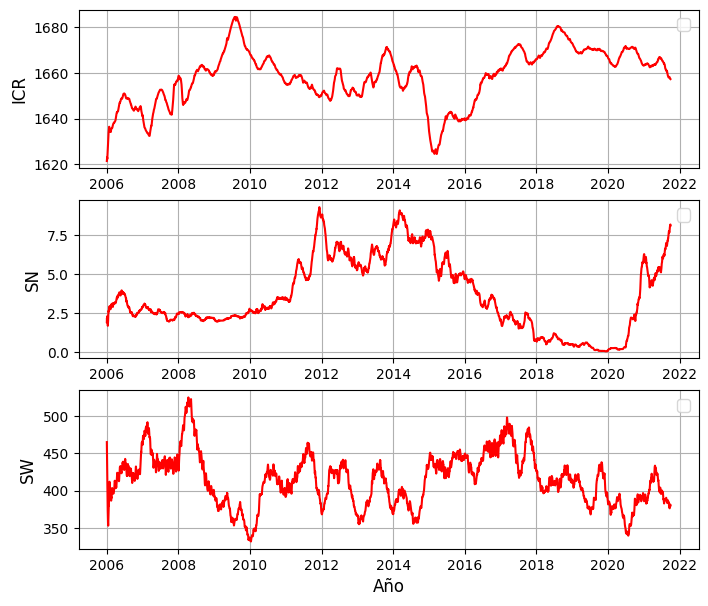

In [6]:
# Crear tres gráficos independientes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 7))
configure_plots()

# Gráfico 1: ICR
# Calcular y graficar el promedio suavizado en el Gráfico 1
rolling_CRI = pd.Series(CRI).rolling(window=90, min_periods=1).mean()
ax1.plot(date_sc, rolling_CRI, color='red', label='')
ax1.set_title('')
ax1.set_ylabel('ICR')
ax1.grid()

# Gráfico 2: Sunspot number
# Calcular y graficar el promedio suavizado en el Gráfico 2
rolling_SNvals = pd.Series(SNvals).rolling(window=90, min_periods=1).mean()
ax2.plot(date_sc, rolling_SNvals, color='red', label='')
ax2.set_title('')
ax2.set_ylabel('SN')
ax2.grid()

# Gráfico 3: Solar wind
# Calcular y graficar el promedio suavizado en el Gráfico 3
rolling_SWvals = pd.Series(SWvals).rolling(window=90, min_periods=1).mean()
ax3.plot(date_sc, rolling_SWvals, color='red', label='')
ax3.set_title('')
ax3.set_xlabel('Año')
ax3.set_ylabel('SW')
ax3.grid()

# Mostrar las leyendas en los gráficos
ax1.legend()
ax2.legend()
ax3.legend()

# Guardar la gráfica en un archivo (opcional)
#plt.savefig('CRI_SN_SW_average.png')
#plt.savefig('CRI_SN_SW_average.pdf')

# Mostrar la gráfica
plt.show()


### ARTÍCULO OLOKETUY 2020

In [22]:
# Filtrar los datos para el rango de años de enero de 2006 a septiembre de 2021
start_d = '1995-01-01'
end_d = '2016-09-30'

#scaler_filtered = scaler_daily[(scaler_daily['Date'] >= start_date) & (scaler_daily['Date'] <= end_date)]
CRIdf_f = CRIdf_daily[(CRIdf_daily['date'] >= start_d) & (CRIdf_daily['date'] <= end_d)]
SSN_f = SSN[(SSN['date'] >= start_d) & (SSN['date'] <= end_d)]
SW_f = SW[(SW['date'] >= start_d) & (SW['date'] <= end_d)]

In [23]:
SSN_f

,index,xx.2,datefrac,sunspots,stdv,nobs,bool,date
64648,64648,1995.001,13,13.0,21,1,NaN,1995-01-01
64649,64649,1995.004,11,7.8,24,1,NaN,1995-01-02
64650,64650,1995.007,15,4.2,21,1,NaN,1995-01-03
64651,64651,1995.010,19,4.4,21,1,NaN,1995-01-04
64652,64652,1995.012,15,1.8,24,1,NaN,1995-01-05
...,...,...,...,...,...,...,...,...
72587,72587,2016.736,29,2.9,34,1,NaN,2016-09-26
72588,72588,2016.739,26,2.2,37,1,NaN,2016-09-27
72589,72589,2016.742,30,2.6,24,1,NaN,2016-09-28
72590,72590,2016.745,17,1.7,40,1,NaN,2016-09-29


In [24]:
# Convertir las columnas en arreglos de NumPy
d_sc = CRIdf_f['date'].values
d_sn = SSN_f['date'].values
d_sw = SW_f['date'].values

CRI_df = CRIdf_f['counts/s'].values
SNv = SSN_f['sunspots'].values
SWv = SW_f['solarw'].values

In [25]:
# Supongamos que tienes un arreglo de NumPy llamado SWv
# Calcula la media
mean_SWv = np.mean(SWv)

# Encuentra los índices de los elementos que están dos veces por encima de la media
indices_to_replace = np.where(SWv > 2 * mean_SWv)

# Reemplaza los valores que cumplen la condición por la media
SWv[indices_to_replace] = mean_SWv

In [26]:
SWv

array([322., 441., 615., ..., 650., 680., 638.])

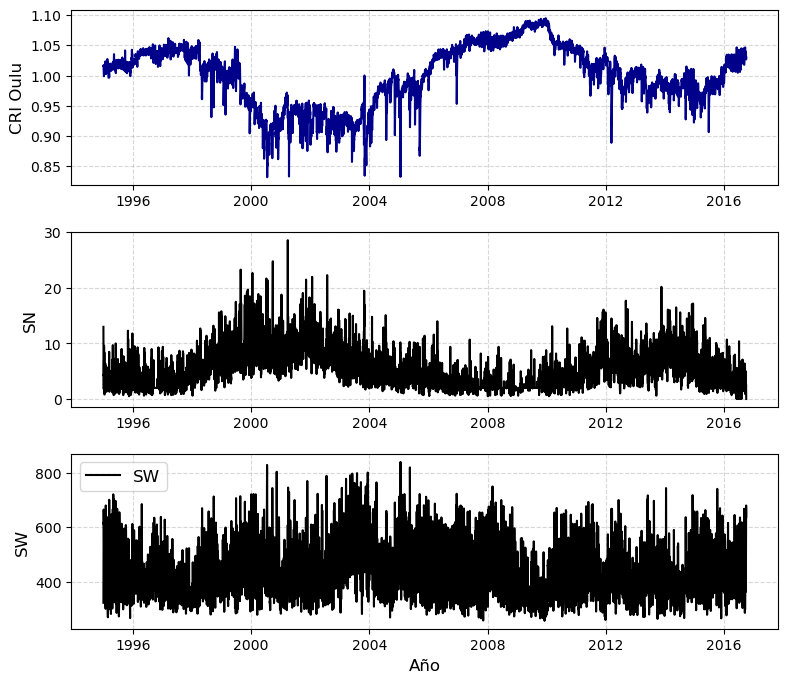

In [27]:
# Crear tres gráficos independientes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 7))
configure_plots()

# Gráfico 1: scaler_daily
#ax1.plot(scaler_filtered['Date'], scaler_filtered['ScalerCorr'].to_numpy(), color='blue', label='ScalerCorr')
ax1.plot(d_sc, CRI_df, color='darkblue', label='Oulu')
ax1.set_title('')
ax1.set_ylabel('CRI Oulu')
ax1.grid()

# Gráfico 2: SSN
#ax2.plot(SSN_filtered['date'], SSN_filtered['SSN'].to_numpy(), color='green', label='SSN')
ax2.plot(d_sn, SNv, color='black', label='SSN')
ax2.set_title('')
ax2.set_ylabel('SN')
ax2.grid()

# Gráfico 3: SW
#ax3.plot(SW_filtered['date'], SW_filtered['solarw'].to_numpy(), color='orange', label='SW')
ax3.plot(d_sw, SWv, color='black', label='SW')
ax3.set_title('')
ax3.set_xlabel('Año')
ax3.set_ylabel('SW')
ax3.grid()

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la leyenda en el último gráfico
ax3.legend()

# Mostrar los gráficos
plt.show()

##### Explicación de la página: https://phdinds-aim.github.io/time_series_handbook/07_CrosscorrelationsFourierTransformandWaveletTransform/07_CrosscorrelationsFourierTransformandWaveletTransform.html